# Data Analysis Notebook 

This notebook is designed for the purpose of analyzing data obtained from the Hydra cluster. It provides a set of tools and techniques for performing data analysis tasks and extracting insights from the data.


## EE of the Cut for large range of system sizes


In [27]:
Sys.CPU_THREADS

6

In [28]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
dep_path = "../AdditionalStructure/Julia/"
include("$(dep_path)NewTypes.jl")
include("$(dep_path)BitStringOps.jl")
include("$(dep_path)Measurements.jl")
include("$(dep_path)MICModels.jl")
include("$(dep_path)ModelRuns.jl")
include("$(dep_path)HelperTools.jl")
include("$(dep_path)Iterators.jl");


In [29]:
exp_index = 14
dir_extension = ""
file_prefix = "out/"
filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
data = h5read(filename, "/")

function give_type(data)
    return (data["L"], data["p_b"], data["p_f"])
end

all_data = []

model_data_dict = Dict()

for exp_index in 1:800
    filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
    if ispath(filename)
        data = h5read(filename, "/")
        # print(data["L"],",")
        push!(all_data, data)
        model_data_dict[(data["L"], data["p_b"], data["p_f"])] = data
    end
end
print("data sets read: ",length(all_data))

all_sizes = sort(collect(keys(model_data_dict)))

Data_dict = Dict()

for data in all_data
    L, p_b, p_f = give_type(data)
    Data_dict[L] = Dict()
end

for data in all_data
    L, p_b, p_f = give_type(data)
    p_b = round(p_b, digits=5)
    p_f = round(p_f, digits=5)
    Data_dict[L][(p_b, p_f)] = Dict(
        "mean" => Dict(
            "EE_cut" => mean(data["EE_cut"]),
            "TEE" => mean(data["TEE"]),
            "Fermion_Fermion" => mean(data["Fermion_Fermion"]),
            "Boson_Boson" => mean(data["Boson_Boson"]),
            "Other_Boson_Boson" => mean(data["Other_Boson_Boson"]),
            "TEN" => mean(data["TEN"]),
            ),
        "var" => Dict(
            "EE_cut" => std(data["EE_cut"]),
            "TEE" => std(data["TEE"]),
            "Fermion_Fermion" => std(data["Fermion_Fermion"]),
            "Boson_Boson" => std(data["Boson_Boson"]),
            "Other_Boson_Boson" => std(data["Other_Boson_Boson"]),
            "TEN" => std(data["TEN"]),
            ),
        "median" => Dict(
            "EE_cut" => median(data["EE_cut"]),
            "TEE" => median(data["TEE"]),
            "Fermion_Fermion" => median(data["Fermion_Fermion"]),
            "Boson_Boson" => median(data["Boson_Boson"]),
            "Other_Boson_Boson" => median(data["Other_Boson_Boson"]),
            "TEN" => median(data["TEN"]),
            ),
        "err" => Dict(
            "EE_cut" => std(data["EE_cut"])/sqrt(length(data["EE_cut"])),
            "TEE" => std(data["TEE"])/sqrt(length(data["TEE"])),
            "Fermion_Fermion" => std(data["Fermion_Fermion"])/sqrt(length(data["Fermion_Fermion"])),
            "Boson_Boson" => std(data["Boson_Boson"])/sqrt(length(data["Boson_Boson"])),
            "Other_Boson_Boson" => std(data["Other_Boson_Boson"])/sqrt(length(data["Other_Boson_Boson"])),
            "TEN" => std(data["TEN"])/sqrt(length(data["TEN"])),
            )
        )
end

Data_dict_extra = deepcopy(Data_dict)

data sets read: 451

Dict{Any, Any} with 2 entries:
  18 => Dict{Any, Any}((0.5, 0.0)=>Dict("median"=>Dict("Fermion_Fermion"=>0.0, …
  30 => Dict{Any, Any}((0.5, 0.0)=>Dict("median"=>Dict("Fermion_Fermion"=>0.0, …

In [30]:

exp_index = 1
dir_extension = "_2024-03-31"
file_prefix = "out/"
filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
data = h5read(filename, "/")

for key in keys(data)
    println("$key: $(data[key])")
end


exp_index: 1
TEE: [2.0; 3.0; 2.0; 3.0; 2.0; 3.0; 2.0; 2.0; 2.0; 2.0; 2.0; 2.0; 2.0; 1.0; 1.0; 2.0; 2.0; 4.0; 2.0; 3.0; 2.0; 4.0; 2.0; 2.0; 3.0; 1.0; 2.0; 1.0; 2.0; 1.0; 2.0; 3.0; 1.0; 2.0; 2.0; 2.0; 2.0; 3.0; 3.0; 3.0; 3.0; 2.0; 1.0; 2.0; 1.0; 3.0; 1.0; 3.0; 3.0; 2.0; 2.0; 3.0; 2.0; 1.0; 2.0; 2.0; 3.0; 2.0; 2.0; 1.0; 3.0; 2.0; 2.0; 2.0; 3.0; 1.0; 1.0; 2.0; 2.0; 1.0; 3.0; 2.0; 2.0; 1.0; 1.0; 2.0; 1.0; 2.0; 2.0; 2.0; 2.0; 2.0; 3.0; 1.0; 1.0; 2.0; 2.0; 2.0; 2.0; 2.0; 2.0; 1.0; 2.0; 1.0; 2.0; 1.0; 2.0; 2.0; 3.0; 2.0;;; 90.0; 72.0; 82.0; 69.0; 91.0; 88.0; 75.0; 78.0; 81.0; 91.0; 60.0; 76.0; 76.0; 73.0; 67.0; 68.0; 76.0; 74.0; 108.0; 86.0; 83.0; 93.0; 87.0; 81.0; 84.0; 81.0; 83.0; 84.0; 79.0; 79.0; 88.0; 81.0; 87.0; 62.0; 82.0; 96.0; 92.0; 72.0; 89.0; 86.0; 84.0; 82.0; 69.0; 78.0; 80.0; 70.0; 77.0; 80.0; 95.0; 75.0; 88.0; 74.0; 85.0; 78.0; 80.0; 80.0; 82.0; 84.0; 67.0; 82.0; 76.0; 81.0; 83.0; 100.0; 78.0; 82.0; 84.0; 74.0; 83.0; 85.0; 78.0; 86.0; 80.0; 86.0; 86.0; 78.0; 85.0; 72.0; 82.0; 90.

In [31]:
dir_extension = "_2024-03-31"
file_prefix = "out/"
all_data = []

model_data_dict = Dict()

for exp_index in 1:800
    filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
    if ispath(filename)
        data = h5read(filename, "/")
        # print(data["L"],",")
        push!(all_data, data)
        model_data_dict[data["L"]] = data
    end
end
print("data sets read: ",length(all_data))

all_sizes = sort(collect(keys(model_data_dict)))

data sets read: 800

8-element Vector{Any}:
 24
 30
 36
 42
 48
 54
 60
 66

In [32]:
# Observables_t_p  = []
# for data in all_data
#     if data["L"] == 15
#         for i in 1:avr_back
#             push!(Observables_t_p, data["TEE"][end+1-i, :, :])
#         end
#     end
# end
# Observables_t_p_15  = cat(dims= 3, Observables_t_p...) # implement time averaging

In [33]:
avr_back = "all" # I will not use this at the moment!

CUT_dict_helper = Dict(
    size_key => [] for size_key in keys(model_data_dict)
)

for data in all_data
    size_key = data["L"]
    push!(CUT_dict_helper[size_key], permutedims(data["EE_cut"],(2,3,4,1)))
end

CUT_dict = Dict()

for size_key in all_sizes
    CUT_dict[size_key] = cat(dims= 4, CUT_dict_helper[size_key]...)
end

CUT_means = Dict()
CUT_vars = Dict()
CUT_errs = Dict()
CUT_medians = Dict()

for size_key in all_sizes
    CUT_means[size_key] = mean(CUT_dict[size_key], dims = 4)
    CUT_vars[size_key] = var(CUT_dict[size_key], dims = 4)
    CUT_errs[size_key] = std(CUT_dict[size_key], dims = 4) / sqrt(size(CUT_dict[size_key], 4))
    CUT_medians[size_key] = median(CUT_dict[size_key], dims = 4)
end

CUT_Stats = Dict(
    "mean" => CUT_means,
    "var" => CUT_vars,
    "err" => CUT_errs,
    "median" => CUT_medians
)


Dict{String, Dict{Any, Any}} with 4 entries:
  "median" => Dict(54=>[0.0 0.0 0.0;;; 98.0 80.0 23.0;;; 140.0 125.0 25.0;;; … …
  "err"    => Dict(54=>[0.0 0.0 0.0;;; 0.0294594 0.0465697 0.0432419;;; 0.03612…
  "mean"   => Dict(54=>[0.0 0.0 0.0;;; 98.1049 80.3682 22.8868;;; 140.19 125.31…
  "var"    => Dict(54=>[0.0 0.0 0.0;;; 8.67856 21.6874 18.6987;;; 13.0476 40.57…

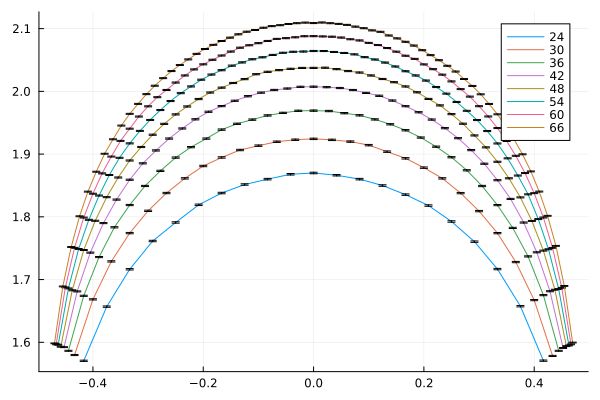

In [34]:
stat = "mean"
ribbon = "err"
p_f_ind = 1
p_b_ind = 1

plot()
for size_key in all_sizes
    x_axis = model_data_dict[size_key]["subdiv_array"] .- size_key/2
    x_axis = x_axis./size_key
    y_axis = CUT_Stats[stat][size_key][p_f_ind, p_b_ind, :] .- size_key # SAGE to inform which subleading term to cancel
    volume_scale = size_key^2
    area_scale = size_key
    critical_scale = size_key*log2(size_key)
    scale = area_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][p_f_ind, p_b_ind, :]
    y_err = y_err./scale 
    plot!(x_axis[3:end-2], y_axis[3:end-2], yerror = y_err[3:end-2], label = size_key)
end

plot!()

In [52]:
using LsqFit

stat = "mean"
ribbon = "err"
p_f_ind = 1
p_b_ind = 1

Cut_mesh = []
for size_key in all_sizes
    append!(Cut_mesh, model_data_dict[size_key]["subdiv_array"][3:end-2])
end

L_mesh = []
for size_key in all_sizes
    append!(L_mesh, repeat([size_key],length(model_data_dict[size_key]["subdiv_array"][3:end-2])))
end

Data_to_fit = []
for size_key in all_sizes
    append!(Data_to_fit, CUT_Stats[stat][size_key][p_f_ind, p_b_ind, :][3:end-2])
end
Data_to_fit = Data_to_fit./L_mesh # Expected scaling, a is area law and b is the central charge

Data_err = []
for size_key in all_sizes
    append!(Data_err, CUT_Stats[ribbon][size_key][p_f_ind, p_b_ind, :][3:end-2])
end
Data_err = Data_err./L_mesh

L_n_Cut = hcat(L_mesh, Cut_mesh)

function quasi_one_dim(L_n_Cut, params)
    L, Cut = L_n_Cut
    a, b, a_p, b_p = params
    return (a .+ a_p./L_mesh) .*log.(L_mesh./pi.*sin.(pi.*Cut_mesh./L_mesh))./3 .+ b .- b_p./L_mesh
end

function quasi_one_dim(L, subdiv_array, params)
    a, b, a_p, b_p = params
    return (a + a_p/L) .*log.(L./pi.*sin.(pi.*subdiv_array./L))./3 .+ b .- b_p/L
end

fit = LsqFit.curve_fit(quasi_one_dim, L_n_Cut, Data_to_fit, [1.0, 1.0, 1.0, 1.0])

plot()
for size_key in all_sizes
    x_axis = model_data_dict[size_key]["subdiv_array"]
    y_fit = quasi_one_dim(size_key, x_axis, fit.param)
    x_axis = x_axis .- size_key/2
    x_axis = x_axis./size_key
    y_axis = CUT_Stats[stat][size_key][p_f_ind, p_b_ind, :] #.- size_key # SAGE to inform which subleading term to cancel
    volume_scale = size_key^2
    area_scale = size_key
    critical_scale = size_key*log2(size_key)
    scale = area_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][p_f_ind, p_b_ind, :]
    y_err = y_err./scale 
    plot!(x_axis[3:end-2], y_axis[3:end-2], yerror = y_err[3:end-2], label = false, line= 0)
    plot!(x_axis[3:end-2], y_fit[3:end-2], label = "L:$size_key", line= 2)
end

p_1 = plot!(xlabel = "relative cut position", ylabel = "EE/L")

stat = "mean"
variable = "TEE"
cut_off = 4
L = 18

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict_extra[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = min(Data_dict_extra[L][key][stat][variable], cut_off)
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_3 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", title="L = $L, $stat $variable", cbar = false)
p_f_arr  = [0.55]
p_b_arr = [0.0, 0.1, 0.35]
p_f = p_f_arr[p_f_ind]
p_b = p_b_arr[p_b_ind]
p_3 = scatter!([p_b], [p_f], markersize = 5, legend = false, color = :red, label = "p_b = $p_b, p_f = $p_f")

plot(p_1, p_3, layout = (1,2), size = (1200, 500), margin = 10Plots.mm, title = "")
savefig("Plots/EE_pb:$p_b.pdf")

"/Users/jovanjovanovic/GitHub/Subsystem-Code-Physics/Toric_Code/Plots/EE_pb:0.0.pdf"

In [36]:
fit.param

4-element Vector{Float64}:
 0.6366859472100506
 2.4751536863279804
 0.6507543785890669
 1.3401743427226416

In [50]:
stat = "mean"
ribbon = "err"
p_f_ind = 1
p_b_ind = 2

plot()
for size_key in all_sizes
    x_axis = model_data_dict[size_key]["subdiv_array"]
    y_fit = quasi_one_dim(size_key, x_axis, fit.param)
    x_axis = x_axis .- size_key/2
    x_axis = x_axis./size_key
    y_axis = CUT_Stats[stat][size_key][p_f_ind, p_b_ind, :] .- y_fit .* size_key # We need to understand this number
    volume_scale = size_key^2
    area_scale = size_key
    critical_scale = size_key*log2(size_key)
    scale = volume_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][p_f_ind, p_b_ind, :]
    y_err = y_err./scale 
    plot!(x_axis[3:end-2], y_axis[3:end-2], yerror = y_err[3:end-2], label = size_key)
end

p_1 = plot!(xlabel = "relative cut position", ylabel = "EE/L^2")

stat = "mean"
variable = "TEE"
cut_off = 4
L = 18

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict_extra[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = min(Data_dict_extra[L][key][stat][variable], cut_off)
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_3 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", title="L = $L, $stat $variable", cbar = false)
p_f_arr  = [0.55]
p_b_arr = [0.0, 0.1, 0.35]
p_f = p_f_arr[p_f_ind]
p_b = p_b_arr[p_b_ind]
p_3 = scatter!([p_b], [p_f], markersize = 5, legend = false, color = :red, label = "p_b = $p_b, p_f = $p_f")

plot(p_1, p_3, layout = (1,2), size = (1200, 500), margin = 10Plots.mm, title = "")
savefig("Plots/EE_pb:$p_b.pdf")

"/Users/jovanjovanovic/GitHub/Subsystem-Code-Physics/Toric_Code/Plots/EE_pb:0.1.pdf"

In [51]:
stat = "mean"
ribbon = "err"
p_f_ind = 1
p_b_ind = 3

plot()
for size_key in all_sizes
    x_axis = model_data_dict[size_key]["subdiv_array"] .- size_key/2
    x_axis = x_axis./size_key
    y_axis = CUT_Stats[stat][size_key][p_f_ind, p_b_ind, :]
    volume_scale = size_key^2
    area_scale = size_key
    critical_scale = size_key*log2(size_key)
    scale = area_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][p_f_ind, p_b_ind, :]
    y_err = y_err./scale 
    plot!(x_axis[:], y_axis[:], yerror = y_err[:], label = size_key, ylims = (0, 1))
end

p_1 = plot!(xlabel = "relative cut position", ylabel = "EE/L")

stat = "mean"
variable = "TEE"
cut_off = 4
L = 18

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict_extra[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = min(Data_dict_extra[L][key][stat][variable], cut_off)
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_3 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", title="L = $L, $stat $variable", cbar = false)
p_f_arr  = [0.55]
p_b_arr = [0.0, 0.1, 0.35]
p_f = p_f_arr[p_f_ind]
p_b = p_b_arr[p_b_ind]
p_3 = scatter!([p_b], [p_f], markersize = 5, legend = false, color = :red, label = "p_b = $p_b, p_f = $p_f")

plot(p_1, p_3, layout = (1,2), size = (1200, 500), margin = 10Plots.mm, title = "")
savefig("Plots/EE_pb:$p_b.pdf")

"/Users/jovanjovanovic/GitHub/Subsystem-Code-Physics/Toric_Code/Plots/EE_pb:0.35.pdf"

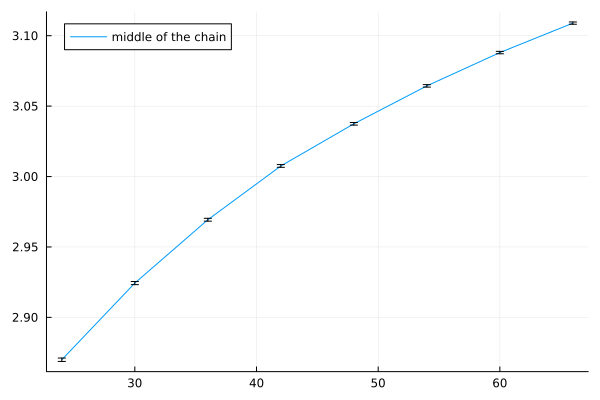

In [39]:
stat = "mean"
ribbon = "err"
p_f_ind = 1
p_b_ind = 1

funct = []
err = []
for size_key in all_sizes
    push!(funct, CUT_Stats[stat][size_key][p_f_ind, p_b_ind, round(Int, end/2+0.5)])
    push!(err, CUT_Stats[ribbon][size_key][p_f_ind, p_b_ind, round(Int, end/2+0.5)])    
end

crit = all_sizes .* log2.(all_sizes)
vol = all_sizes.^2
area = all_sizes

corre = area

plot(all_sizes, funct./corre, yerr = err./corre, label = "middle of the chain")

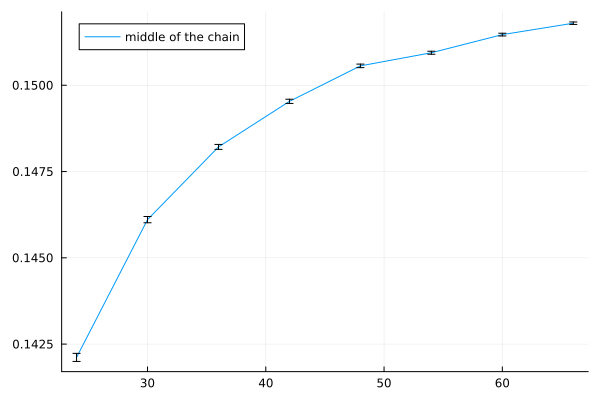

In [40]:
stat = "mean"
ribbon = "err"
p_f_ind = 1
p_b_ind = 2

funct = []
err = []
for size_key in all_sizes
    val = CUT_Stats[stat][size_key][p_f_ind, p_b_ind, round(Int, end/2+0.5)] - CUT_Stats[stat][size_key][p_f_ind, 1, round(Int, end/2+0.5)]
    push!(funct, val)
    push!(err, CUT_Stats[ribbon][size_key][p_f_ind, p_b_ind, round(Int, end/2+0.5)])    
end

crit = all_sizes .* log2.(all_sizes)
vol = all_sizes.^2
area = all_sizes

corre = vol

plot(all_sizes, funct./corre, yerr = err./corre, label = "middle of the chain")

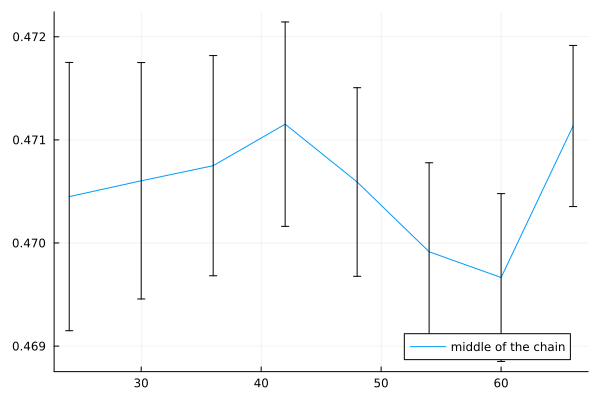

In [41]:
stat = "mean"
ribbon = "err"
p_f_ind = 1
p_b_ind = 3

funct = []
err = []
for size_key in all_sizes
    push!(funct, CUT_Stats[stat][size_key][p_f_ind, p_b_ind, round(Int, end/2+0.5)])
    push!(err, CUT_Stats[ribbon][size_key][p_f_ind, p_b_ind, round(Int, end/2+0.5)])    
end

crit = all_sizes .* log2.(all_sizes)
vol = all_sizes.^2
area = all_sizes

corre = area

plot(all_sizes, funct./corre, yerr = err./corre, label = "middle of the chain")

In [42]:
Vector{Int}(all_sizes)

8-element Vector{Int64}:
 24
 30
 36
 42
 48
 54
 60
 66